In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [126]:
df=pd.read_csv("CVD_cleaned - in.csv")

In [127]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [128]:
df.shape

(308854, 19)

In [129]:
df.describe

<bound method NDFrame.describe of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No 

In [130]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [131]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160,81.19,31.71,No,1,5,12,1


In [132]:
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [133]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [134]:
df.duplicated().sum()

80

In [135]:
new_df = df.drop_duplicates()

In [136]:
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [137]:
# columns_to_convert=['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History']
# new_df[columns_to_convert]=new_df[columns_to_convert].replace({'Yes':1,'No':0})
#Label Encoding
encoder=LabelEncoder()
new_df['Exercise']=encoder.fit_transform(new_df['Exercise'])
new_df['Heart_Disease']=encoder.fit_transform(new_df['Heart_Disease'])
new_df['Skin_Cancer']=encoder.fit_transform(new_df['Skin_Cancer'])
new_df['Other_Cancer']=encoder.fit_transform(new_df['Other_Cancer'])
new_df['Depression']=encoder.fit_transform(new_df['Depression'])
new_df['Arthritis']=encoder.fit_transform(new_df['Arthritis'])
new_df['Smoking_History']=encoder.fit_transform(new_df['Smoking_History'])

In [138]:
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,Yes,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,No,0,Male,80+,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,1,0,0,0,0,No,0,Male,25-29,168,81.65,29.05,0,4,30,8,0
308850,Fair,Within the past 5 years,1,0,0,0,0,Yes,0,Male,65-69,180,69.85,21.48,0,8,15,60,4
308851,Very Good,5 or more years ago,1,0,0,0,1,"Yes, but female told only during pregnancy",0,Female,30-34,157,61.23,24.69,1,4,40,8,4
308852,Very Good,Within the past year,1,0,0,0,0,No,0,Male,65-69,183,79.38,23.73,0,3,30,12,0


In [139]:
from collections import Counter
Counter(new_df['Diabetes']).most_common()

[('No', 259062),
 ('Yes', 40170),
 ('No, pre-diabetes or borderline diabetes', 6896),
 ('Yes, but female told only during pregnancy', 2646)]

In [140]:
# special_column=['Diabetes']
# new_df[special_column]=new_df[special_column].replace({'Yes':1,'No':0,'Yes, but female told only during pregnancy':2,'No, pre-diabetes or borderline diabetes':3})
# new_df
# new_df['Diabetes']=encoder.fit_transform(new_df['Diabetes'])
# new_df
mapping = {'Yes': '00', 'No': '01', 'Yes, but female told only during pregnancy': '10', 'No, pre-diabetes or borderline diabetes': '11'}
new_df['Diabetes'] = df['Diabetes'].map(mapping)
new_df
# Counter(new_df['Diabetes']).most_common()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,01,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,00,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,00,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,00,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,01,0,Male,80+,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,1,0,0,0,0,01,0,Male,25-29,168,81.65,29.05,0,4,30,8,0
308850,Fair,Within the past 5 years,1,0,0,0,0,00,0,Male,65-69,180,69.85,21.48,0,8,15,60,4
308851,Very Good,5 or more years ago,1,0,0,0,1,10,0,Female,30-34,157,61.23,24.69,1,4,40,8,4
308852,Very Good,Within the past year,1,0,0,0,0,01,0,Male,65-69,183,79.38,23.73,0,3,30,12,0


In [141]:
# Rankwise encoding
new_df['General_Health']=new_df['General_Health'].replace({'Poor':1,'Fair':2,'Good':3,'Very Good':4,'Excellent':5}) 
new_df
# new_df['General_Health']=encoder.fit_transform(new_df['General_Health'])
# new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,0,0,0,0,0,01,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,4,Within the past year,0,1,0,0,0,00,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,4,Within the past year,1,0,0,0,0,00,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,1,Within the past year,1,1,0,0,0,00,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,3,Within the past year,0,0,0,0,0,01,0,Male,80+,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Within the past year,1,0,0,0,0,01,0,Male,25-29,168,81.65,29.05,0,4,30,8,0
308850,2,Within the past 5 years,1,0,0,0,0,00,0,Male,65-69,180,69.85,21.48,0,8,15,60,4
308851,4,5 or more years ago,1,0,0,0,1,10,0,Female,30-34,157,61.23,24.69,1,4,40,8,4
308852,4,Within the past year,1,0,0,0,0,01,0,Male,65-69,183,79.38,23.73,0,3,30,12,0


In [142]:
# new_df['Sex']=new_df['Sex'].replace({'Male':0,'Female':1})
# new_df
new_df['Sex']=encoder.fit_transform(new_df['Sex'])
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,0,0,0,0,0,01,1,0,70-74,150,32.66,14.54,1,0,30,16,12
1,4,Within the past year,0,1,0,0,0,00,0,0,70-74,165,77.11,28.29,0,0,30,0,4
2,4,Within the past year,1,0,0,0,0,00,0,0,60-64,163,88.45,33.47,0,4,12,3,16
3,1,Within the past year,1,1,0,0,0,00,0,1,75-79,180,93.44,28.73,0,0,30,30,8
4,3,Within the past year,0,0,0,0,0,01,0,1,80+,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Within the past year,1,0,0,0,0,01,0,1,25-29,168,81.65,29.05,0,4,30,8,0
308850,2,Within the past 5 years,1,0,0,0,0,00,0,1,65-69,180,69.85,21.48,0,8,15,60,4
308851,4,5 or more years ago,1,0,0,0,1,10,0,0,30-34,157,61.23,24.69,1,4,40,8,4
308852,4,Within the past year,1,0,0,0,0,01,0,1,65-69,183,79.38,23.73,0,3,30,12,0


In [143]:
# Counter(new_df['Age_Category']).most_common()
# unique_values=new_df['Age_Category'].unique()
# for value in unique_values:
#     print(f"{value}")
new_df['Age_Category']=new_df['Age_Category'].replace({'18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6,'50-54':7,'55-59':8,'60-64':9,'65-69':10,'70-74':11,'75-79':12,'80+':13});
new_df['Age_Category']

0         11
1         11
2          9
3         12
4         13
          ..
308849     2
308850    10
308851     3
308852    10
308853     6
Name: Age_Category, Length: 308774, dtype: int64

In [144]:
# # # # Ordinal encoding
# def encode_age_category(x):
#     if '+' in x:
#         return int(x[:-1]) + 5  # Assuming '80+' represents ages 80 and above
#     else:
#         return np.mean([int(val) for val in x.split('-')])

# new_df['Age_Category'] = new_df['Age_Category'].apply(encode_age_category)

In [145]:
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,Within the past 2 years,0,0,0,0,0,01,1,0,11,150,32.66,14.54,1,0,30,16,12
1,4,Within the past year,0,1,0,0,0,00,0,0,11,165,77.11,28.29,0,0,30,0,4
2,4,Within the past year,1,0,0,0,0,00,0,0,9,163,88.45,33.47,0,4,12,3,16
3,1,Within the past year,1,1,0,0,0,00,0,1,12,180,93.44,28.73,0,0,30,30,8
4,3,Within the past year,0,0,0,0,0,01,0,1,13,191,88.45,24.37,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,Within the past year,1,0,0,0,0,01,0,1,2,168,81.65,29.05,0,4,30,8,0
308850,2,Within the past 5 years,1,0,0,0,0,00,0,1,10,180,69.85,21.48,0,8,15,60,4
308851,4,5 or more years ago,1,0,0,0,1,10,0,0,3,157,61.23,24.69,1,4,40,8,4
308852,4,Within the past year,1,0,0,0,0,01,0,1,10,183,79.38,23.73,0,3,30,12,0


In [146]:
# new_df['Checkup']=new_df['Checkup'].replace({'Within the past year':4,'Within the past 5 years':2,'Within the past 2 years':3,'5 or more years ago':1,'Never':0})
# new_df
# new_df['Checkup']=encoder.fit_transform(new_df['Checkup'])
# new_df
# rank_order_checkup = {'Within the past year': 1, 'Within the past 2 years': 2, 'Within the past 5 years': 3, '5 or more years ago': 4}

# # Apply rank-wise encoding to the 'Checkup' column
# new_df['Checkup'] = new_df['Checkup'].map(rank_order_checkup)

# # Handling "Never"
# never_value = 5  # Assigning a special value to represent "Never"
# new_df.loc[new_df['Checkup'] == 'Never', 'encoded_checkup'] = never_value

# # Display the DataFrame with the encoded column
# print(new_df)
if 'Checkup' in new_df.columns:
    one_hot_encoded = pd.get_dummies(new_df['Checkup'], prefix='check')
    new_df = pd.concat([new_df, one_hot_encoded], axis=1)
    new_df = new_df.drop('Checkup', axis=1)          


In [147]:
# new_df=new_df.drop('BMI',axis='columns')
new_df['check_5 or more years ago']=new_df['check_5 or more years ago'].replace({False:0,True:1})
new_df['check_Never']=new_df['check_Never'].replace({False:0,True:1}) 
new_df['check_Within the past 2 years']=new_df['check_Within the past 2 years'].replace({False:0,True:1})
new_df['check_Within the past 5 years']=new_df['check_Within the past 5 years'].replace({False:0,True:1})
new_df['check_Within the past year']=new_df['check_Within the past year'].replace({False:0,True:1})
X=new_df.drop('Heart_Disease',axis='columns')
X

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,check_5 or more years ago,check_Never,check_Within the past 2 years,check_Within the past 5 years,check_Within the past year
0,1,0,0,0,0,01,1,0,11,150,...,1,0,30,16,12,0,0,1,0,0
1,4,0,0,0,0,00,0,0,11,165,...,0,0,30,0,4,0,0,0,0,1
2,4,1,0,0,0,00,0,0,9,163,...,0,4,12,3,16,0,0,0,0,1
3,1,1,0,0,0,00,0,1,12,180,...,0,0,30,30,8,0,0,0,0,1
4,3,0,0,0,0,01,0,1,13,191,...,1,0,8,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,01,0,1,2,168,...,0,4,30,8,0,0,0,0,0,1
308850,2,1,0,0,0,00,0,1,10,180,...,0,8,15,60,4,0,0,0,1,0
308851,4,1,0,0,1,10,0,0,3,157,...,1,4,40,8,4,1,0,0,0,0
308852,4,1,0,0,0,01,0,1,10,183,...,0,3,30,12,0,0,0,0,0,1


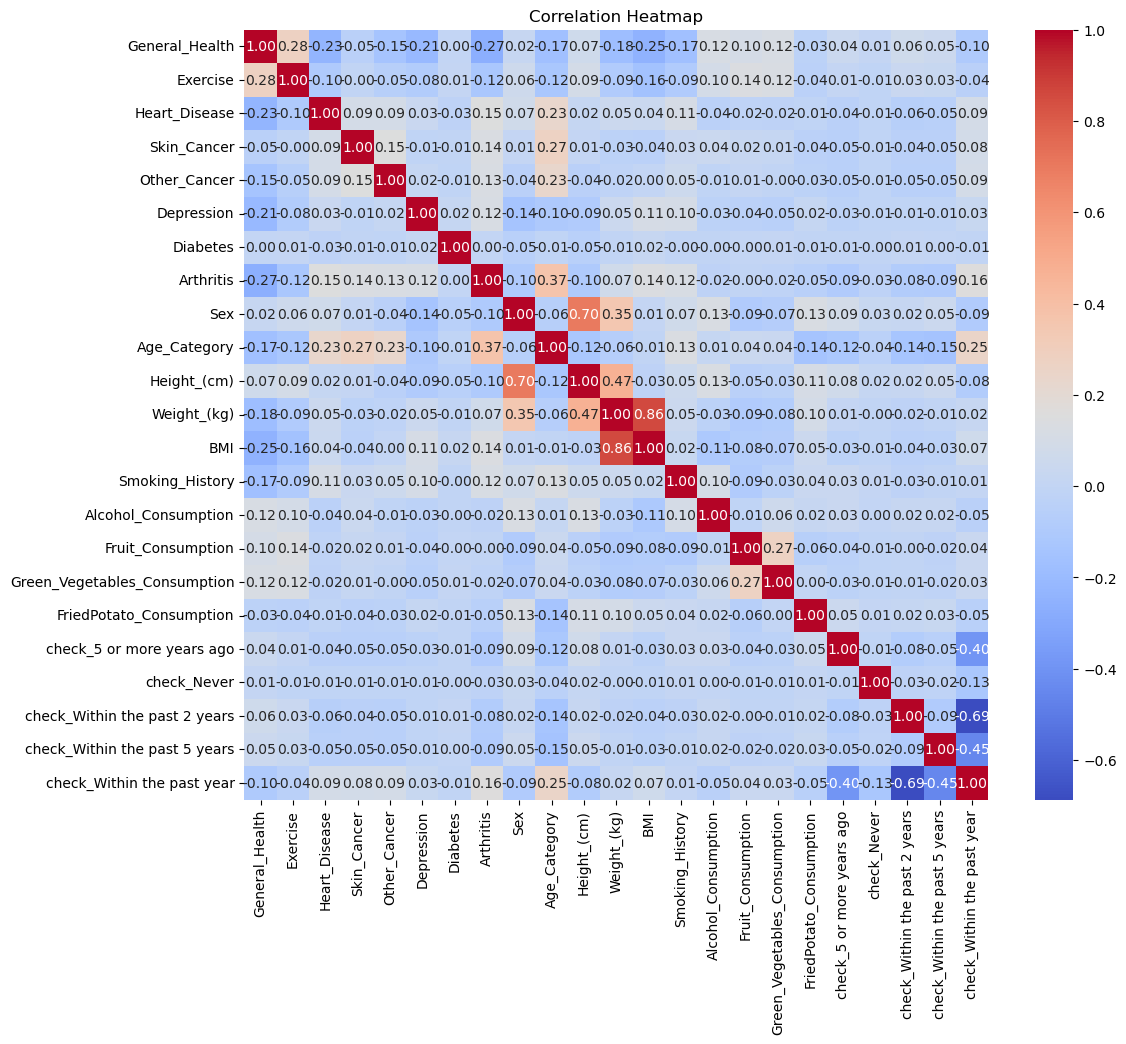

In [148]:
correlation_matrix = new_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [149]:
X.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'check_5 or more years ago', 'check_Never',
       'check_Within the past 2 years', 'check_Within the past 5 years',
       'check_Within the past year'],
      dtype='object')

In [150]:
Y=new_df.Heart_Disease
Y

0         0
1         1
2         0
3         1
4         0
         ..
308849    0
308850    0
308851    0
308852    0
308853    0
Name: Heart_Disease, Length: 308774, dtype: int32

                          Feature  Importance
11                            BMI    0.116082
10                    Weight_(kg)    0.112542
9                     Height_(cm)    0.101842
15   Green_Vegetables_Consumption    0.100856
16        FriedPotato_Consumption    0.100420
8                    Age_Category    0.094548
14              Fruit_Consumption    0.093563
13            Alcohol_Consumption    0.067294
0                  General_Health    0.065520
5                        Diabetes    0.039931
6                       Arthritis    0.017748
7                             Sex    0.014346
4                      Depression    0.013957
1                        Exercise    0.013070
12                Smoking_History    0.012418
3                    Other_Cancer    0.012056
2                     Skin_Cancer    0.011400
21     check_Within the past year    0.005634
19  check_Within the past 2 years    0.002736
20  check_Within the past 5 years    0.001867
17      check_5 or more years ago 

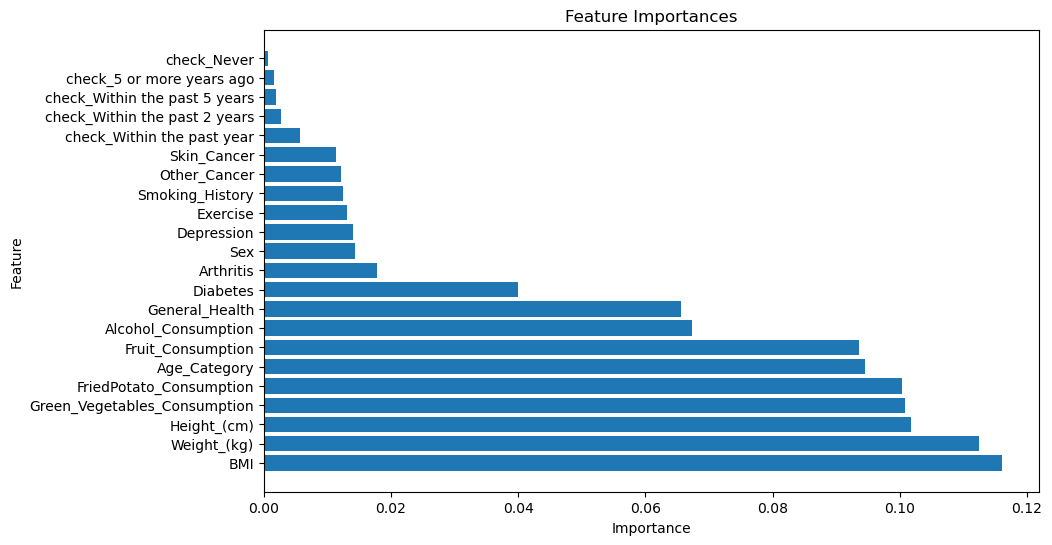

In [151]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Classifier
etc_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
etc_model.fit(X_train, y_train)

# Get feature importances
feature_importances = etc_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [152]:
X=new_df[['BMI','Height_(cm)','Weight_(kg)','Green_Vegetables_Consumption','FriedPotato_Consumption','Age_Category','Fruit_Consumption','General_Health','Alcohol_Consumption']]
Y=new_df['Heart_Disease']

In [153]:
from imblearn.under_sampling import RandomUnderSampler


# Perform undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, Y)

# Split the resampled data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logistic_model = LogisticRegression()
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
# logistic_model_tuned = GridSearchCV(logistic_model, param_grid, cv=5)
# logistic_model_tuned.fit(X_train_scaled, y_train)
# logistic_model = LogisticRegression(
#     penalty='l1',        # Regularization
#     C=1.0,               # Inverse of regularization strength
#     solver='saga',      # Algorithm to use in optimization problem
#     max_iter=100,        # Maximum number of iterations for optimization
#     random_state=42      # Random seed for reproducibility
# )
logistic_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_lr_val = logistic_model.predict(X_val_scaled)
accuracy_lr_val = accuracy_score(y_val, y_pred_lr_val)
print("Logistic Regression Accuracy on Validation Set:", accuracy_lr_val)
print("\nLogistic Regression Classification Report on Validation Set:\n", classification_report(y_val, y_pred_lr_val))

# Model evaluation on test set
y_pred_lr_test = logistic_model.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("\nLogistic Regression Accuracy on Test Set:", accuracy_lr_test)
print("\nLogistic Regression Classification Report on Test Set:\n", classification_report(y_test, y_pred_lr_test))

Logistic Regression Accuracy on Validation Set: 0.7457174638487208

Logistic Regression Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      4446
           1       0.74      0.78      0.76      4544

    accuracy                           0.75      8990
   macro avg       0.75      0.75      0.75      8990
weighted avg       0.75      0.75      0.75      8990


Logistic Regression Accuracy on Test Set: 0.7371371371371371

Logistic Regression Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.75      0.70      0.73      2499
           1       0.72      0.77      0.75      2496

    accuracy                           0.74      4995
   macro avg       0.74      0.74      0.74      4995
weighted avg       0.74      0.74      0.74      4995



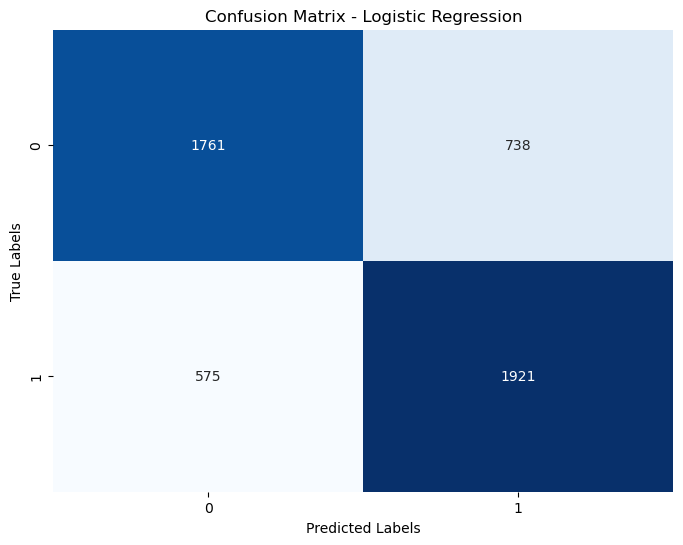

In [155]:
cm_lr = confusion_matrix(y_test, y_pred_lr_test)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


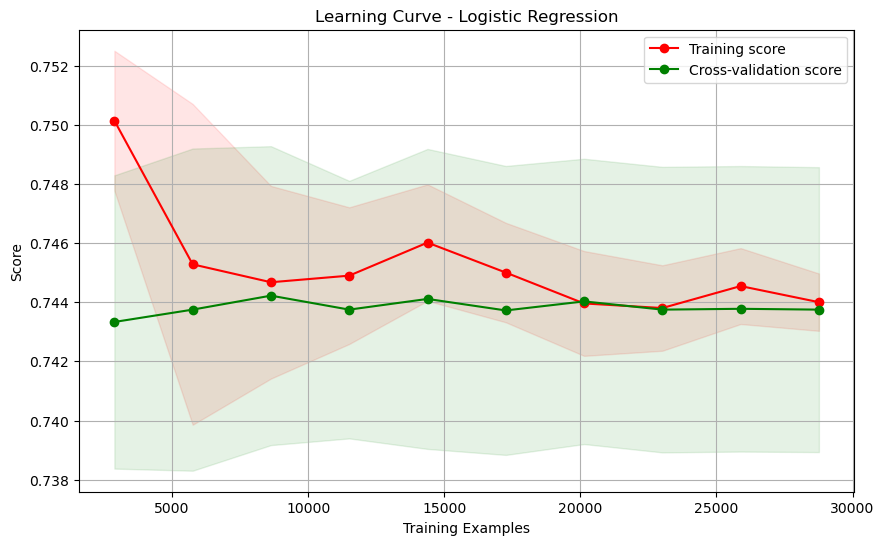

In [156]:
def plot_learning_curve_lgr(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title("Learning Curve - Logistic Regression")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_learning_curve_lgr(logistic_model, X_train_scaled, y_train)

In [157]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_rf_val = rf_model.predict(X_val_scaled)
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
print("Random Forest Classifier Accuracy on Validation Set:", accuracy_rf_val)
print("\nRandom Forest Classifier Classification Report on Validation Set:\n", classification_report(y_val, y_pred_rf_val))

# Model evaluation on test set
y_pred_rf_test = rf_model.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("\nRandom Forest Classifier Accuracy on Test Set:", accuracy_rf_test)
print("\nRandom Forest Classifier Classification Report on Test Set:\n", classification_report(y_test, y_pred_rf_test))

Random Forest Classifier Accuracy on Validation Set: 0.7340378197997776

Random Forest Classifier Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      4446
           1       0.73      0.76      0.74      4544

    accuracy                           0.73      8990
   macro avg       0.73      0.73      0.73      8990
weighted avg       0.73      0.73      0.73      8990


Random Forest Classifier Accuracy on Test Set: 0.7301301301301302

Random Forest Classifier Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      2499
           1       0.72      0.76      0.74      2496

    accuracy                           0.73      4995
   macro avg       0.73      0.73      0.73      4995
weighted avg       0.73      0.73      0.73      4995



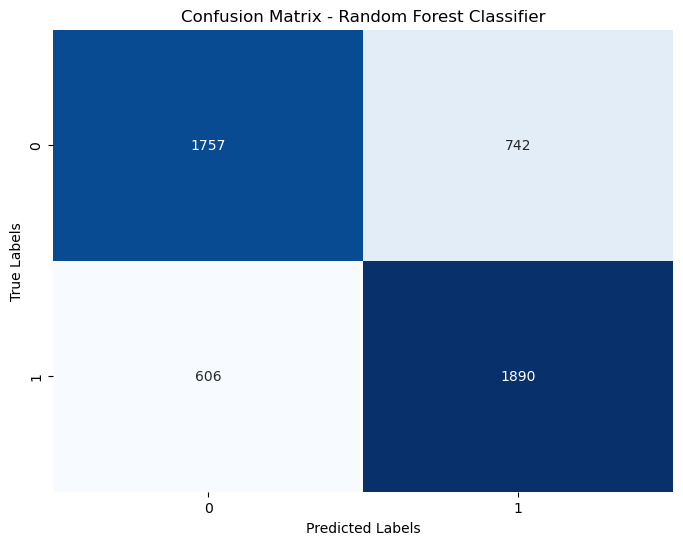

In [158]:
cm_rf = confusion_matrix(y_test, y_pred_rf_test)

# Confusion matrix for Random Forest Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [159]:
# def plot_learning_curve_rfc(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy')
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.figure(figsize=(10, 6))
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

#     plt.title("Learning Curve - Random Forest Classifier")
#     plt.xlabel("Training Examples")
#     plt.ylabel("Score")
#     plt.legend(loc="best")
#     plt.grid(True)
#     plt.show()

# plot_learning_curve_rfc(rf_model, X_train_scaled, y_train)


In [160]:

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_scaled, y_train)

# Model evaluation on validation set
y_pred_knn_val = knn_model.predict(X_val_scaled)
accuracy_knn_val = accuracy_score(y_val, y_pred_knn_val)
print("KNN Accuracy on Validation Set:", accuracy_knn_val)
print("\nKNN Classification Report on Validation Set:\n", classification_report(y_val, y_pred_knn_val))

# Model evaluation on test set
y_pred_knn_test = knn_model.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("\nKNN Accuracy on Test Set:", accuracy_knn_test)
print("\nKNN Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn_test))

KNN Accuracy on Validation Set: 0.72146829810901

KNN Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      4446
           1       0.73      0.71      0.72      4544

    accuracy                           0.72      8990
   macro avg       0.72      0.72      0.72      8990
weighted avg       0.72      0.72      0.72      8990


KNN Accuracy on Test Set: 0.7199199199199199

KNN Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      2499
           1       0.73      0.70      0.71      2496

    accuracy                           0.72      4995
   macro avg       0.72      0.72      0.72      4995
weighted avg       0.72      0.72      0.72      4995



In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_accuracy)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


Epoch 1/10
1124/1124 [==============================] - 21s 17ms/step - loss: 0.5332 - accuracy: 0.7406 - val_loss: 0.5259 - val_accuracy: 0.7406
Epoch 2/10
1124/1124 [==============================] - 22s 20ms/step - loss: 0.5247 - accuracy: 0.7429 - val_loss: 0.5232 - val_accuracy: 0.7433
Epoch 3/10
1124/1124 [==============================] - 20s 17ms/step - loss: 0.5222 - accuracy: 0.7468 - val_loss: 0.5221 - val_accuracy: 0.7437
Epoch 4/10
1124/1124 [==============================] - 21s 19ms/step - loss: 0.5208 - accuracy: 0.7463 - val_loss: 0.5244 - val_accuracy: 0.7439
Epoch 5/10
1124/1124 [==============================] - 18s 16ms/step - loss: 0.5194 - accuracy: 0.7476 - val_loss: 0.5210 - val_accuracy: 0.7439
Epoch 6/10
1124/1124 [==============================] - 16s 15ms/step - loss: 0.5184 - accuracy: 0.7479 - val_loss: 0.5245 - val_accuracy: 0.7454
Epoch 7/10
1124/1124 [==============================] - 18s 16ms/step - loss: 0.5175 - accuracy: 0.7493 - val_loss: 0.5203 -